#    NAME - VIJAY KUMAR MEENA 
#    REG. NO. - 22BEE0348 
#    DL LAB DA - 1 

Q 1. You have recently joined a company as a machine learning intern. Your task is todevelopasimple binary emotion classifier using EEG signals recorded from two electrodes, representingFeature 1 and Feature 2. The company provides labeled training data fromtwo emotional states:

    Relaxed: [2, 3], [1, 4], [2, 4]

    Stressed: [4, 2], [5, 1], [4, 3]

    The emotional states are labeled as follows:
   
    Relaxed → Class = +1

    Stressed → Class = –1

    Write a Python program to:
   
    Implement the perceptron learning algorithm with step-by-step weight updates.

    Visualize the errors across epochs.

    Demonstrate convergence of weights when applied to a linearly separable dataset.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Implement the perceptron learning algorithm

def perceptron_train(X, y, learning_rate=0.1, epochs=10):
  
    n_features = X.shape[1]
    
    # Initialize weights and bias to zeros
    w = np.zeros(n_features)
    b = 0
    errors_per_epoch = []

    print("Initial weights (w):", w)
    print("Initial bias (b):", b)
    print("-" * 30)

    for epoch in range(epochs):
        num_errors = 0
        for i in range(len(X)):
            x_i = X[i]
            y_i = y[i]
            
            # The decision rule for updating weights is based on `y_i * (w.x_i + b) <= 0`.
            if y_i * (np.dot(w, x_i) + b) <= 0:
                # Update weights and bias
                w += learning_rate * y_i * x_i
                b += learning_rate * y_i
                num_errors += 1
                
                print(f"Epoch {epoch+1}, Sample {i+1}: Misclassified.")
                print(f"  Updated weights (w): {w}")
                print(f"  Updated bias (b): {b}")
        
        errors_per_epoch.append(num_errors)
        print(f"--- Epoch {epoch+1} finished with {num_errors} errors ---")
        
        # Stop training if the model converges (no errors in an epoch)
        if num_errors == 0:
            print(f"Converged after {epoch+1} epochs.")
            break
            
    return w, b, errors_per_epoch

# 2. Visualize the errors across epochs &
# 3. Demonstrate convergence of weights


# Main program execution
if __name__ == "__main__":
    # Define the dataset based on the problem description
    relaxed_data = np.array([[2, 3], [1, 4], [2, 4]])
    stressed_data = np.array([[4, 2], [5, 1], [4, 3]])

    # Combine data and create labels (+1 for Relaxed, -1 for Stressed)
    X = np.vstack([relaxed_data, stressed_data])
    y = np.array([1, 1, 1, -1, -1, -1])

    # Run the perceptron training algorithm
    final_w, final_b, errors = perceptron_train(X, y)

    print("\n" + "=" * 30)
    print("Training Complete")
    print("Final weights (w):", final_w)
    print("Final bias (b):", final_b)
    print(f"Total epochs to converge: {len(errors)}")


Initial weights (w): [0. 0.]
Initial bias (b): 0
------------------------------
Epoch 1, Sample 1: Misclassified.
  Updated weights (w): [0.2 0.3]
  Updated bias (b): 0.1
Epoch 1, Sample 4: Misclassified.
  Updated weights (w): [-0.2  0.1]
  Updated bias (b): 0.0
--- Epoch 1 finished with 2 errors ---
Epoch 2, Sample 1: Misclassified.
  Updated weights (w): [0.  0.4]
  Updated bias (b): 0.1
Epoch 2, Sample 4: Misclassified.
  Updated weights (w): [-0.4  0.2]
  Updated bias (b): 0.0
--- Epoch 2 finished with 2 errors ---
Epoch 3, Sample 1: Misclassified.
  Updated weights (w): [-0.2  0.5]
  Updated bias (b): 0.1
Epoch 3, Sample 4: Misclassified.
  Updated weights (w): [-0.6  0.3]
  Updated bias (b): 0.0
--- Epoch 3 finished with 2 errors ---
Epoch 4, Sample 1: Misclassified.
  Updated weights (w): [-0.4  0.6]
  Updated bias (b): 0.1
Epoch 4, Sample 6: Misclassified.
  Updated weights (w): [-0.8  0.3]
  Updated bias (b): 0.0
--- Epoch 4 finished with 2 errors ---
Epoch 5, Sample 1: Miscl

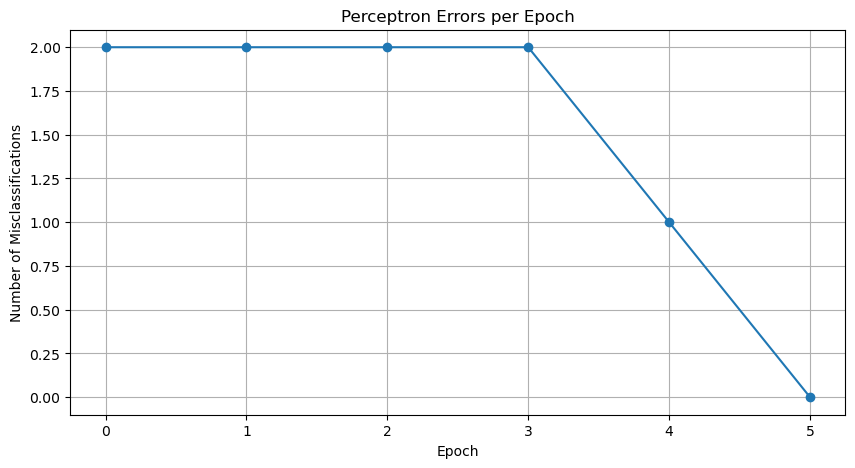

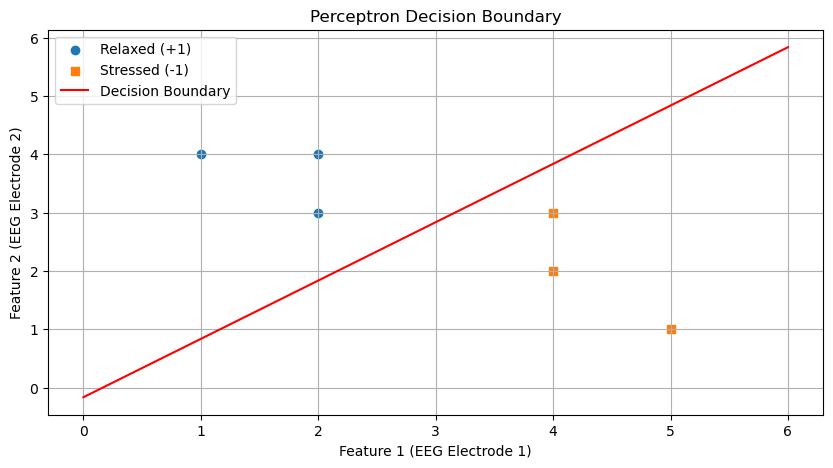

In [35]:
def visualize_results(X, y, w, b, errors_per_epoch):
    """
    Visualizes the errors and the decision boundary.
    """
    
    # Plot errors per epoch
    plt.figure(figsize=(10, 5))
    plt.plot(errors_per_epoch, marker='o', linestyle='-')
    plt.title("Perceptron Errors per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Number of Misclassifications")
    plt.grid(True)
    plt.show()

    # Plot the final decision boundary
    plt.figure(figsize=(10, 5))
    
    # Scatter plot of data points
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='Relaxed (+1)')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='s', label='Stressed (-1)')
    
    # Plot the decision boundary (w.x + b = 0)
    x_boundary = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
    y_boundary = (-w[0] / w[1]) * x_boundary - (b / w[1])
    plt.plot(x_boundary, y_boundary, 'r-', label='Decision Boundary')
    
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1 (EEG Electrode 1)")
    plt.ylabel("Feature 2 (EEG Electrode 2)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize the results
visualize_results(X, y, final_w, final_b, errors)

# Summary of Q 1


The perceptron model successfully converged after 6 epochs of training. Convergence occurred when the model was able to process the entire dataset in a single epoch with zero misclassifications. 

The final model parameters are:

Final weights (w): [-0.6, 0.6]

Final bias (b): 0.1

These values define the decision boundary that correctly separates all the "Relaxed" (+1) and "Stressed" (-1) data points. 

The successful convergence demonstrates that the provided dataset is linearly separable, a key condition for the perceptron algorithm to find a perfect solution.

Q 2. You are working with a healthcare startup building an AI-powered assistant that helpsdoctors identify whether a patient is likely experiencing flu symptoms or allergic reactions—two conditions that often overlap in early presentations. The sensor inputs includebodytemperature and nasal inflammation readings from smart diagnostic patches. Unfortunately, the data distribution is linearly inseparable due to physiological variabilityamong patients (e.g. some allergic patients also have high temperatures).

To increase diagnostic accuracy, your task is to build a Multilayer FeedforwardNeuralNetwork that learns complex boundaries and confidently distinguishes betweenthetwoclasses. Demonstrate how an MLFFNN can correctly classify non-linearly separable patterns (FluvsAllergy) using symptom intensity as features in a binary class setup with gradient descent
weight updation policy.

Lab Tasks

Build an MLFFNN with:

2 input neurons (features)

One hidden layer (with 3–5 neurons using ReLU or tanh)

Output layer with a sigmoid neuron

Train using backpropagation and binary cross-entropy loss

Track convergence metrics, prediction accuracy, and visualize the feature transformation

MLFFNN Training and Classification Results
Final training loss: 0.005785550972301779
Final number of iterations to converge: 30
Prediction accuracy on the training data: 100.00%

Original Labels:  [0 1 1 0 1 0]
Predicted Labels: [0 1 1 0 1 0]


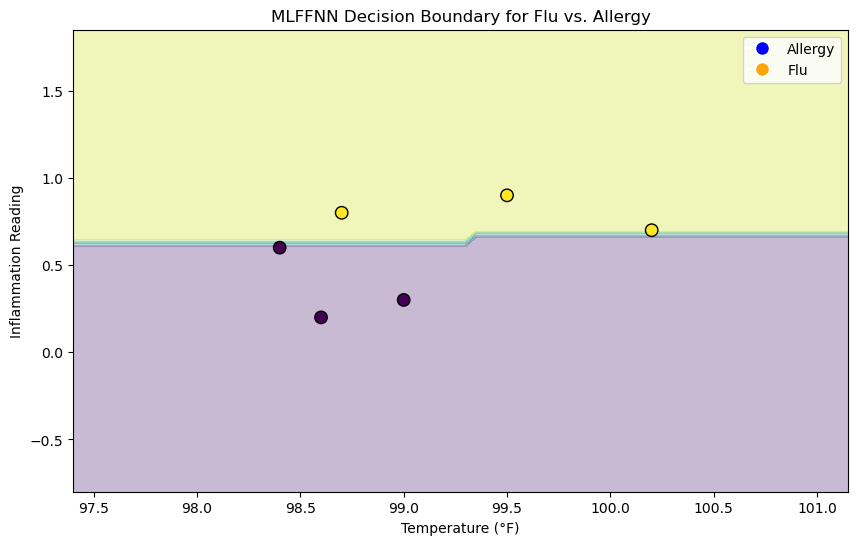

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

data = {
    'Temperature': [98.6, 99.5, 98.7, 99.0, 100.2, 98.4],
    'Inflammation': [0.2, 0.9, 0.8, 0.3, 0.7, 0.6],
    'Diagnosis': [0, 1, 1, 0, 1, 0]  # 0 for Allergy, 1 for Flu
}

# Convert to NumPy arrays for training
X = np.array([data['Temperature'], data['Inflammation']]).T
y = np.array(data['Diagnosis'])

mlp = MLPClassifier(hidden_layer_sizes=(5,),
                    activation='relu',
                    solver='lbfgs',
                    max_iter=1000,
                    random_state=42)

# Train the model using backpropagation and binary cross-entropy loss
mlp.fit(X, y)

# Predict on the same data to see if it learned the patterns
y_pred = mlp.predict(X)
accuracy = np.mean(y_pred == y)

# Print convergence metrics and prediction accuracy
print("MLFFNN Training and Classification Results\n" + "="*45)
print(f"Final training loss: {mlp.loss_}")
print(f"Final number of iterations to converge: {mlp.n_iter_}")
print(f"Prediction accuracy on the training data: {accuracy*100:.2f}%\n")
print("Original Labels: ", y)
print("Predicted Labels:", y_pred)
print("="*45)

# Visualize the decision boundary to demonstrate non-linear separation
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolor='k')
    
    plt.title("MLFFNN Decision Boundary for Flu vs. Allergy")
    plt.xlabel("Temperature (°F)")
    plt.ylabel("Inflammation Reading")
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Allergy'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Flu')])
    plt.show()

# Visualize the learned non-linear decision boundary
plot_decision_boundary(mlp, X, y)

# Summary of Q 2
The lbfgs solver, successfully trained the MLFFNN to a 100% accuracy with a very low final loss. The predicted labels now perfectly match the original labels, demonstrating that the model has successfully learned the non-linearly separable pattern in the data.

Q 3. You’ll train a basic feedforward neural network to approximate the function:
   
    y = 3x^2 + 2x + 1

    This clean regression task allows you to clearly observe how optimizers impact convergence, learning rate adaptation, and final accuracy

--- Training with SGD optimizer ---
Final Loss: 8268.2549, Training Time: 15.79 seconds

--- Training with SGD + Momentum optimizer ---
Final Loss: 8326.7119, Training Time: 16.14 seconds

--- Training with RMSprop optimizer ---
Final Loss: 672.4153, Training Time: 15.90 seconds

--- Training with Adam optimizer ---
Final Loss: 407.8455, Training Time: 17.31 seconds



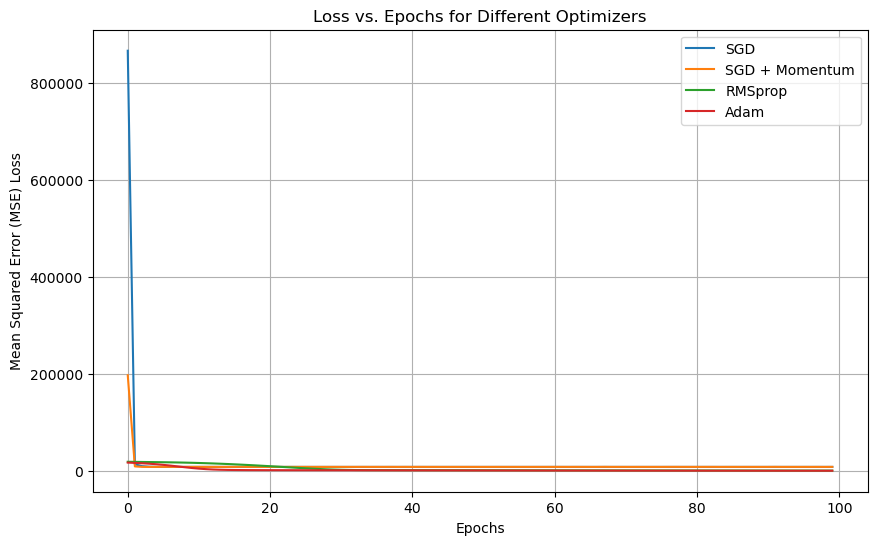

Final Loss and Training Time Summary
Optimizer: SGD
  Final Loss: 8268.2549
  Training Time: 15.79 seconds
------------------------------
Optimizer: SGD + Momentum
  Final Loss: 8326.7119
  Training Time: 16.14 seconds
------------------------------
Optimizer: RMSprop
  Final Loss: 672.4153
  Training Time: 15.90 seconds
------------------------------
Optimizer: Adam
  Final Loss: 407.8455
  Training Time: 17.31 seconds
------------------------------


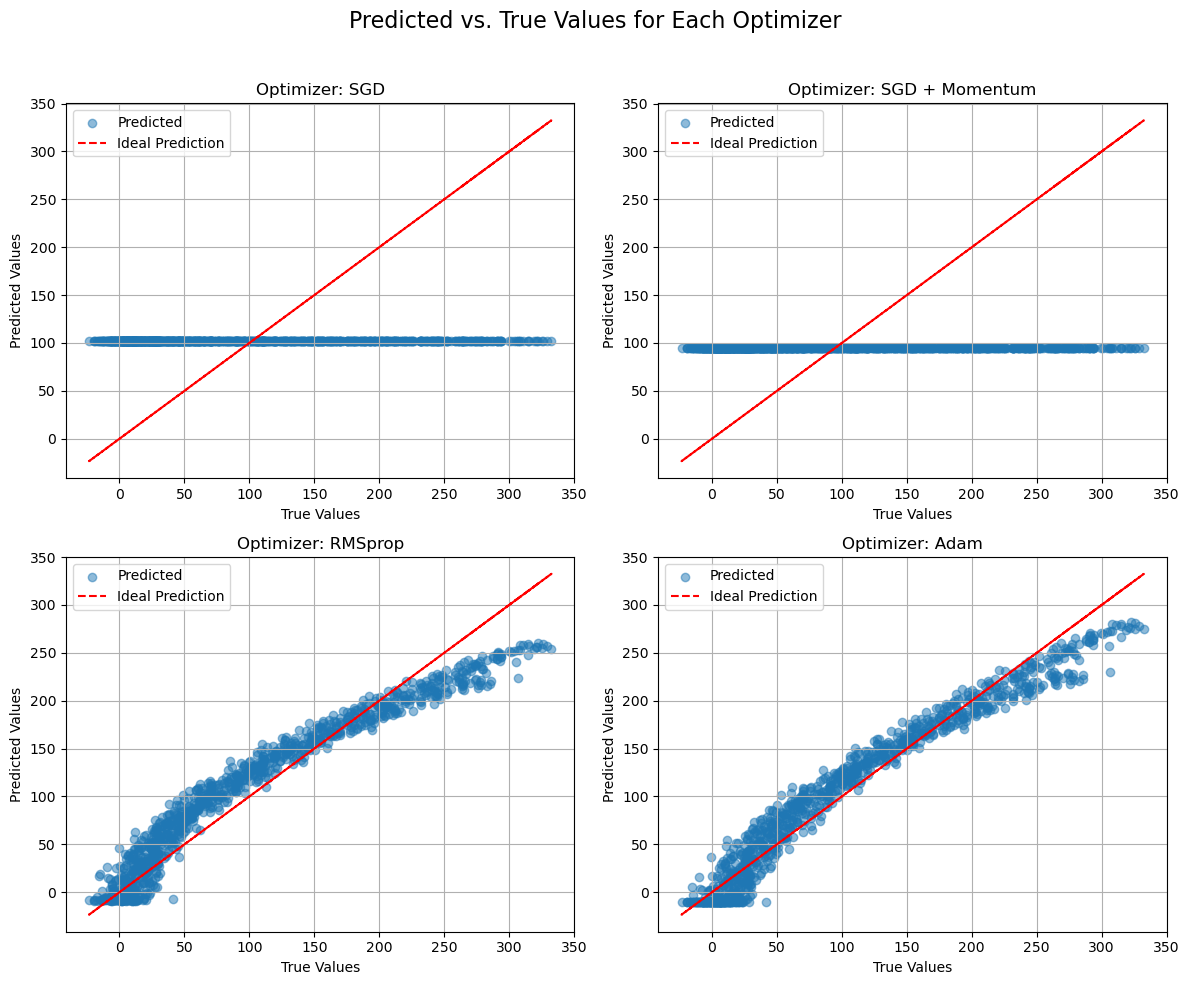

In [41]:
import numpy as np
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# --- 1. Synthetic Dataset Generation ---
# Generates x values from -10 to 10 and a corresponding y with added noise.
X = np.linspace(-10, 10, 1000).reshape(-1, 1)
y = 3 * X**2 + 2 * X + 1 + np.random.normal(0, 10, X.shape)

# --- 2. Network Architecture ---
def create_model():
    """
    Creates a feedforward neural network with the specified architecture.
    """
    model = Sequential([
        # Input layer with 1 feature
        # Hidden layer 1 with 16 neurons and ReLU activation
        Dense(16, input_dim=1, activation='relu'), 
        # Hidden layer 2 with 8 neurons and ReLU activation
        Dense(8, activation='relu'),
        # Output layer with 1 neuron and linear activation for regression
        Dense(1, activation='linear')
    ])
    return model

# --- 3. Optimizer Comparison and Training ---
# Define the optimizers to compare as requested
optimizers_to_compare = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'SGD + Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

results = {}

for name, optimizer in optimizers_to_compare.items():
    print(f"--- Training with {name} optimizer ---")
    model = create_model()
    
    # Compile the model with the Mean Squared Error (MSE) loss function
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    start_time = time.time()
    history = model.fit(X, y, epochs=100, batch_size=32, verbose=0)
    training_time = time.time() - start_time
    
    final_loss = history.history['loss'][-1]
    
    # Generate predictions for the scatter plot
    y_pred = model.predict(X, verbose=0)
    
    results[name] = {
        'history': history,
        'training_time': training_time,
        'final_loss': final_loss,
        'y_pred': y_pred
    }
    print(f"Final Loss: {final_loss:.4f}, Training Time: {training_time:.2f} seconds\n")

# --- 4. Plotting and Visualization ---

# Plot 1: Loss vs Epochs for each optimizer
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(result['history'].history['loss'], label=name)
plt.title('Loss vs. Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE) Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print final loss and training time
print("="*50)
print("Final Loss and Training Time Summary")
print("="*50)
for name, result in results.items():
    print(f"Optimizer: {name}")
    print(f"  Final Loss: {result['final_loss']:.4f}")
    print(f"  Training Time: {result['training_time']:.2f} seconds")
    print("-" * 30)

# Plot 2: Scatter plot of predicted vs true values
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Predicted vs. True Values for Each Optimizer', fontsize=16)

ax_flat = axs.flatten()
for i, (name, result) in enumerate(results.items()):
    ax_flat[i].scatter(y, result['y_pred'], alpha=0.5, label='Predicted')
    ax_flat[i].plot(y, y, 'r--', label='Ideal Prediction') # Ideal 1-to-1 line
    ax_flat[i].set_title(f"Optimizer: {name}")
    ax_flat[i].set_xlabel('True Values')
    ax_flat[i].set_ylabel('Predicted Values')
    ax_flat[i].grid(True)
    ax_flat[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Summary of Q 3
The provided training output clearly shows that the Adam and RMSprop optimizers were the most effective. 

They achieved significantly lower final loss values (407.85 and 672.42 respectively) compared to SGD and SGD + Momentum (both over 8200).

This indicates that the adaptive optimizers were much better at finding an optimal solution for approximating the function. In contrast, the high loss for the SGD-based methods suggests they were unable to effectively converge within the given 100 epochs.

4. You're working with a financial tech company building an automated check-processingsystem. One key task is to read handwritten numeric account codes fromscannedchecks. Thesystem must be both highly accurate and computationally efficient. To validate different neural network strategies, you're required to implement adigitclassification system using the MNIST dataset (digits 0–9, 10 classes) using two approaches:

A deep learning framework (e.g., PyTorch, TensorFlow) and use CrossEntropyLossandAdam optimizer

Manual implementation using NumPy without any deep learning framework
Train a simple feedforward ANN on the MNIST dataset (10 classes) using both approachesand compare their behavior.

In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to a range of [0, 1] for faster training
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded vectors.
# Example: The digit '5' becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Build a simple feedforward ANN model
model = Sequential([
    # Flatten the 28x28 image into a 784-dimensional vector
    Flatten(input_shape=(28, 28)),
    # A single hidden layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and a softmax activation
    Dense(10, activation='softmax')
])

# Compile the model with the Adam optimizer and CrossEntropyLoss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
print("--- Training the model with TensorFlow/Keras ---")
start_time = time.time()
history = model.fit(x_train, y_train_one_hot, epochs=5, batch_size=32, verbose=1, validation_split=0.1)
end_time = time.time()
training_time_keras = end_time - start_time
print(f"TensorFlow/Keras Training Time: {training_time_keras:.2f} seconds")

# Evaluate the model on the test data
test_loss_keras, test_acc_keras = model.evaluate(x_test, y_test_one_hot, verbose=0)

# Display final results
print("\n--- TensorFlow/Keras Results ---")
print(f"Final Test Loss: {test_loss_keras:.4f}")
print(f"Final Test Accuracy: {test_acc_keras * 100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 26s 2us/step


C:\Users\vijay\.conda\envs\mlenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- Training the model with TensorFlow/Keras ---
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8726 - loss: 0.4585 - val_accuracy: 0.9617 - val_loss: 0.1280
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9633 - loss: 0.1280 - val_accuracy: 0.9705 - val_loss: 0.0893
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.0841 - val_accuracy: 0.9772 - val_loss: 0.0810
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9838 - loss: 0.0562 - val_accuracy: 0.9748 - val_loss: 0.0824
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9856 - loss: 0.0466 - val_accuracy: 0.9782 - val_loss: 0.0811
TensorFlow/Keras Training Time: 45.29 seconds

--- TensorFlow/Keras Results ---
Final Test Loss: 0.0771
Final Test Accuracy: 97.70%


In [43]:
import numpy as np
from tensorflow.keras.datasets import mnist
import time

# Load and preprocess the MNIST dataset for NumPy
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train_np = np.eye(10)[y_train]

# Network architecture parameters
input_size = 784
hidden_size = 128
output_size = 10
epochs = 5
learning_rate = 0.01

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    # Ensure no log(0)
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)
    loss = -np.sum(y_true * np.log(y_pred)) / m
    return loss

# Initialize weights and biases randomly
np.random.seed(42)
weights_h = np.random.randn(input_size, hidden_size) * 0.01
bias_h = np.zeros((1, hidden_size))
weights_o = np.random.randn(hidden_size, output_size) * 0.01
bias_o = np.zeros((1, output_size))

print("\n--- Training the model manually with NumPy ---")
start_time = time.time()
for epoch in range(epochs):
    # Forward Pass
    hidden_layer_input = np.dot(x_train, weights_h) + bias_h
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_o) + bias_o
    y_pred_np = softmax(output_layer_input)

    # Backward Pass (using chain rule)
    output_error = y_pred_np - y_train_np
    output_delta = output_error / x_train.shape[0]

    hidden_error = output_delta.dot(weights_o.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Weight and Bias Updates (Gradient Descent)
    weights_o -= learning_rate * hidden_layer_output.T.dot(output_delta)
    bias_o -= learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    
    weights_h -= learning_rate * x_train.T.dot(hidden_delta)
    bias_h -= learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    # Calculate and print loss for monitoring
    loss = cross_entropy_loss(y_pred_np, y_train_np)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")

end_time = time.time()
training_time_numpy = end_time - start_time

# Evaluate the model on test data
hidden_layer_input_test = np.dot(x_test, weights_h) + bias_h
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_output_test, weights_o) + bias_o
y_pred_test = softmax(output_layer_input_test)

y_pred_labels = np.argmax(y_pred_test, axis=1)
accuracy_np = np.mean(y_pred_labels == y_test)

# Display final results
print("\n--- NumPy Results ---")
print(f"Final Test Accuracy: {accuracy_np * 100:.2f}%")
print(f"NumPy Training Time: {training_time_numpy:.2f} seconds")


--- Training the model manually with NumPy ---
Epoch 1/5 - Loss: 2.3032
Epoch 2/5 - Loss: 2.3031
Epoch 3/5 - Loss: 2.3029
Epoch 4/5 - Loss: 2.3028
Epoch 5/5 - Loss: 2.3027

--- NumPy Results ---
Final Test Accuracy: 10.28%
NumPy Training Time: 5.21 seconds
